# Chapter 6: Drawing Geometric Shapes and Fractals

## Drawing geometric shapes with Matplotlib’s Patches

### Drawing a Circle

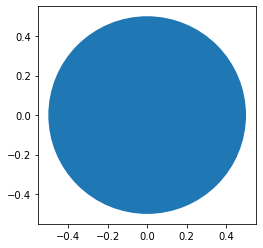

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
circle = patches.Circle((0, 0), radius=0.5)
ax.add_patch(circle)
ax.autoscale()
ax.set_aspect("equal")
plt.show()

### Creating Animated Figures

[matplotlib.animation.FuncAnimation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation) クラスでアニメーションを作成

In [2]:
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from IPython.display import HTML


# Update Function
# i: frame number
# circle: patch object
def update_radius(i, circle):
    circle.radius = i * 0.5
    return circle


fig, ax = plt.subplots()

ax.set_title("Simple Circle Animation")
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect("equal")

circle = patches.Circle((0, 0), 0.05)
ax.add_patch(circle)

# make an animation
anim = animation.FuncAnimation(
    fig, update_radius, fargs=(circle,), frames=30, interval=50
)

plt.close()
HTML(anim.to_jshtml())

### Animating a Projectile’s Trajectory

In [3]:
import math

import matplotlib.animation as animation
import matplotlib.pyplot as plt


# Generate equally spaced floating point numbers between two given values
def f_range(start, final, increment):
    numbers = []

    while start < final:
        numbers.append(start)
        start += increment

    return numbers


def get_intervals(u, theta):
    # Time of flight
    t_flight = 2 * u * math.sin(theta) / g
    # time intervals
    return f_range(0, t_flight, 0.005)


def update_position(i):
    # def update_position(i, circle, intervals, u, theta):
    t = intervals[i]
    x = u * math.cos(theta) * t
    y = u * math.sin(theta) * t - 0.5 * g * (t ** 2)

    circle.center = x, y
    return circle


g = 9.8

# initial speed
u = 25
# angle
theta = math.radians(30)

fig, ax = plt.subplots()

ax.set_title("Projectile Motion")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# time intervals
intervals = get_intervals(u, theta)

xmax = u * math.cos(theta) * intervals[-1]
t_max = u * math.sin(theta) / g
ymax = u * math.sin(theta) * t_max - 0.5 * g * t_max ** 2

ax.set_xlim(0, xmax)
ax.set_ylim(0, ymax)
ax.set_aspect("equal")

circle = patches.Circle((0, 0), 1.0)
ax.add_patch(circle)

# make an animation
anim = animation.FuncAnimation(
    fig,
    update_position,
    frames=len(intervals),
    interval=1,
)

plt.close()
HTML(anim.to_jshtml())

## Drawing Fractals

### Transformations of Points in a Plane

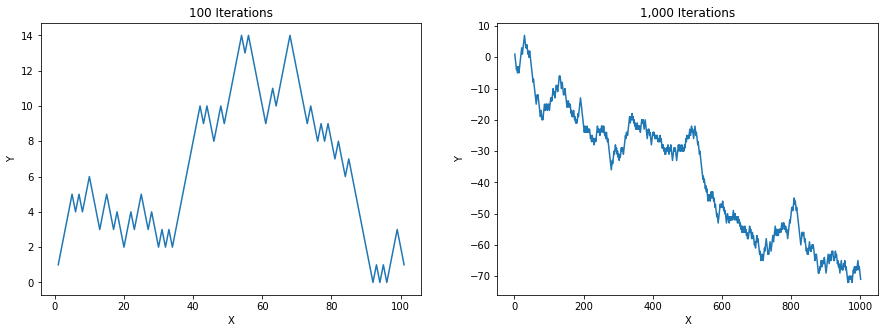

In [4]:
import random

import matplotlib.pyplot as plt


def transformation_1(p):
    return p[0] + 1, p[1] - 1


def transformation_2(p):
    return p[0] + 1, p[1] + 1


def transform(p):
    # List of transformation functions
    transformations = [transformation_1, transformation_2]
    # Pick a random transformation function and call it
    t = random.choice(transformations)
    return t(p)


# p: initial point
# n: the number of iterations
def build_trajectory(p, n):
    x = [p[0]]
    y = [p[1]]
    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y


fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.flatten()

for i, n in enumerate([100, 1000]):
    p = (1, 1)
    x, y = build_trajectory(p, n)

    axes[i].plot(x, y)
    axes[i].set_title("{0:,} Iterations".format(n))
    axes[i].set_xlabel("X")
    axes[i].set_ylabel("Y")

plt.show()

### Drawing the Barnsley Fern

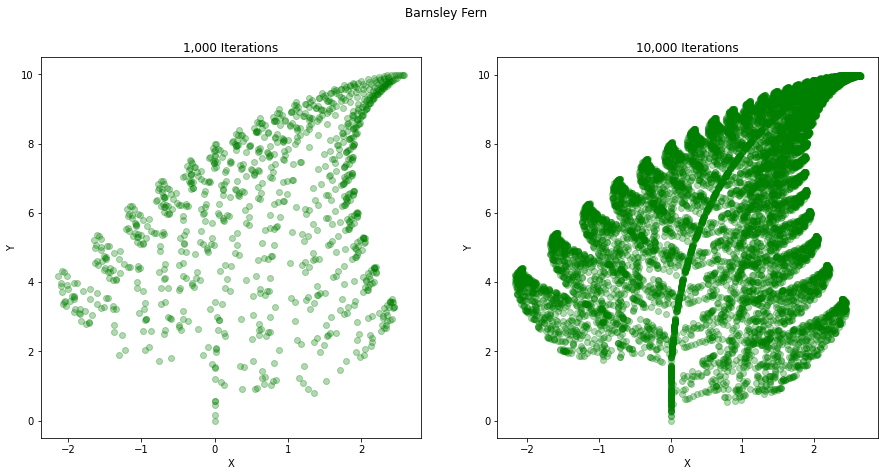

In [5]:
import random

import matplotlib.pyplot as plt


def transformation_1(p):
    x = 0.85 * p[0] + 0.04 * p[1]
    y = -0.04 * p[0] + 0.85 * p[1] + 1.6
    return x, y


def transformation_2(p):
    x = 0.2 * p[0] - 0.26 * p[1]
    y = 0.23 * p[0] + 0.22 * p[1] + 1.6
    return x, y


def transformation_3(p):
    x = -0.15 * p[0] + 0.28 * p[1]
    y = 0.26 * p[0] + 0.24 * p[1] + 0.44
    return x, y


def transformation_4(p):
    x = 0
    y = 0.16 * p[1]
    return x, y


def transform(p):
    # List of transformation functions
    transformations = [
        transformation_1,
        transformation_2,
        transformation_3,
        transformation_4,
    ]
    # Pick a random transformation function and call it
    t = random.choices(transformations, weights=[85, 7, 7, 1])
    return t[0](p)


# n: the number of iterations
def generate_fern(n):
    p = (0, 0)

    x = [p[0]]
    y = [p[1]]

    for i in range(n):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    return x, y


fig, axes = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle("Barnsley Fern")
axes = axes.flatten()

for i, n in enumerate([1000, 10_000]):
    x, y = generate_fern(n)

    axes[i].plot(x, y, "o", color="g", alpha=0.3)

    axes[i].set_title("{0:,} Iterations".format(n))
    axes[i].set_xlabel("X")
    axes[i].set_ylabel("Y")

fig.savefig("chap6_barnsley-fern.png")
plt.show()